## Introduction (Problématique à résoudre)

En tant que développeur IA junior au sein de la société SalesHouses , une plateforme spécialisée dans l’accompagnement des particuliers dans les transactions immobilières (achat et vente).

L’entreprise souhaite moderniser son offre en lançant un simulateur intelligent d’évaluation immobilière . Cet outil permettra aux utilisateurs de saisir les caractéristiques clés d’un bien immobilier (superficie, nombre de chambres, localisation, état, etc.) et d’obtenir une estimation précise du prix de marché, adapté au contexte marocain.

En tant que membre de l’équipe Data & IA, ma mission consiste à concevoir et déployer un modèle de régression supervisé , capable de prédire le prix de vente d’un appartement à partir d’un ensemble de données historiques. Vous serez chargé(e) d’effectuer une analyse exploratoire des données, de préparer les variables pertinentes (feature engineering), d’entraîner plusieurs modèles de régression, d’évaluer leurs performances à l’aide de métriques adaptées, puis de livrer une solution finale intégrable dans l’application web de SalesHouses.

## Description du dataset

Le dataset est un document .csv partagé par nos formatteurs. Il contient 1773 échantillons, chacun décrit par 8 caractéristiques d'entrée ('title', 'city_name', 'salon', 'nb_rooms', 'nb_baths',
       'surface_area', 'equipment', 'link') et une varibale cible qui est le 'price'.

Le but est d'entrainer un modèle de Machine Learning afin de prédire le prix de vente d’un appartement à partir d’un ensemble de données historiques (caractéristiques d'entrée) . 

## Importation des bibliothèques

Avant de commencer, nous devons importer les bibliothèques essentielles pour l'analyse et la modélisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 

## Chargement du dataset 

Nous allons charger les données depuis le fichier .csv nommé: "appartements-data-db-6872f0ba853ec096170787.csv"

In [2]:
db=pd.read_csv('appartements-data-db-6872f0ba853ec096170787.csv')
db.head(5)

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


## Exploration et prétraitement des données

Taille du dataset

In [3]:
shape = db.shape
print("Les dimensions du dataset sont:",shape)

Les dimensions du dataset sont: (1773, 9)


Vérification des types de variables et des valeurs manquantes.

In [4]:
print(db.info())
print(db.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB
None
title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


Statistiques descriptives des variables numériques.

In [5]:
print(db.describe())

             salon     nb_rooms     nb_baths   surface_area
count  1620.000000  1490.000000  1480.000000    1742.000000
mean      1.267284     2.379195     2.307432     174.933410
std       0.557539     0.667159     7.629128    2969.500693
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      89.000000
75%       1.000000     3.000000     2.000000     114.750000
max       8.000000     7.000000   134.000000  123456.000000


Identifier les valeurs uniques par colonne

In [6]:
print(db.nunique())

title           1471
price            355
city_name         77
salon              7
nb_rooms           7
nb_baths          16
surface_area     192
equipment        321
link            1732
dtype: int64


Identifier la fréquence de chaque valeur dans la colonne "titre"

In [7]:
db['title'].value_counts()

title
appartement à vendre                               33
appartement a vendre                               17
Appartement à vendre                               13
appartement                                        12
Appartement                                         8
                                                   ..
Appartement à vendre 55 m² à Tanger                 1
Appartement 94m² RDC impasse à Maârif extension     1
Appartement à vendre dans un complexe medicale      1
appartement 3 chambres avec terrasses               1
Appartement 110 m2 av Allal el fassi                1
Name: count, Length: 1471, dtype: int64

Identifier les doublons.

In [8]:
print("Le nombre des doublons dans le data set", db.duplicated().sum())


Le nombre des doublons dans le data set 41


Supprimer les doublons et vérifier leur suppression.

In [9]:
db.drop_duplicates(inplace=True)
print("Le nombre des doublons dans le data set", db.duplicated().sum())


Le nombre des doublons dans le data set 0


### Modification du type de la variable 'Price'

On a le type de la variable price est object à cause du mot 'MAD' à la fin de chaque prix.
On va essayer de rendre float à partir du code suivant:

In [10]:
db['price_n'] = (
    db['price']
    .str.replace('\u202f', '') # Supprime les espaces insécables
    .str.replace('DH', '')     # Supprime 'DH'
    .str.replace(',', '')      # Supprime les virgules (si présentes)
    .str.strip()               # Supprime les espaces en début/fin
)
db['price_n'] = pd.to_numeric(db['price_n'])

## Distribution des variables numériques.

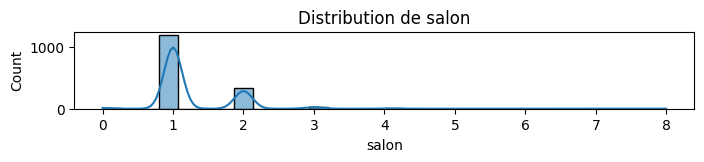

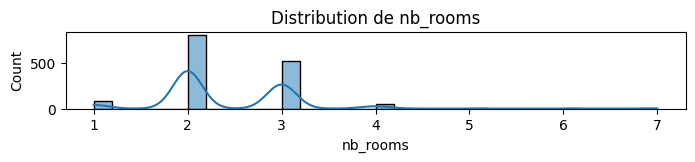

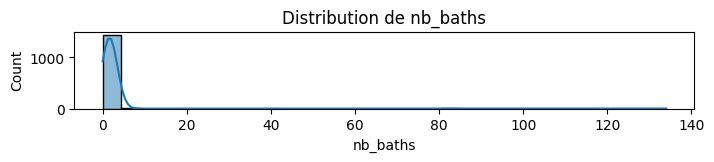

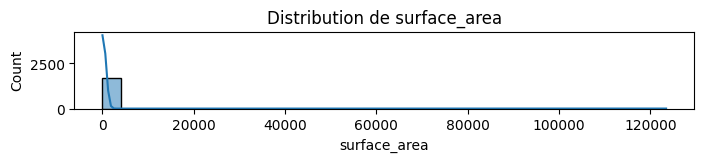

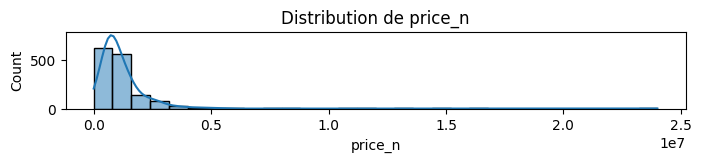

In [11]:
db_num=db.select_dtypes(include='number')
for col in db_num.columns:
    plt.figure(figsize=(8,1))
    sns.histplot(db_num[col],bins=30,kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

On a utilisé ci-dessus la méthode classique pour visualiser la distribution des variables numériques.

Mais on voit que chaque graphe de distribution s'étend au delà des barres visibles (en bleu) pour les features 'surface_area', 'nbr_rooms' et 'nbr_baths', ce qui signifie que ces colonnes contiennent des valeurs abérrantes qui sont très minimes par rapport aux autres, donc ils apparaissent dans les graphes comme étant nulles, or qu'ils sont présents dans le dataset. C'est juste une question d'échelle. 

Pour bien visualiser ces valeurs, on peut changer l'echelle en travaillant avec une échelle logarithmique afin de voir les petites barres, comme dans la visualisation ci-dessous.

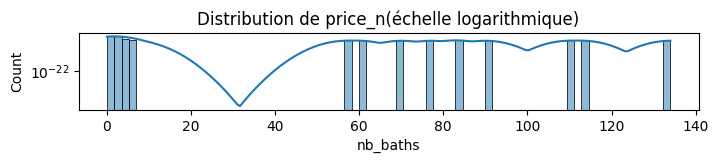

In [12]:

plt.figure(figsize=(8,1))
sns.histplot(data=db, x='nb_baths', kde=True)
plt.yscale('log')  # Échelle logarithmique pour voir les petites barres
plt.title(f"Distribution de {col}(échelle logarithmique)")
plt.show()

Cette visualisations confirment la présence des valeurs abérrantes dans le dataset. Par exemple on remarque qu'il ya des logements avec 135 toilettes ( nbr_baths) ce qui est logiquement impossible. 

Les résultats de simulation nous donnent des idées sur notre dataset. Le dataset courant  doit etre netoyé.

Ci-dessous une ligne de code qui donne en output combien de fois se répète les differentes valeurs que prend la variable 'nb_baths', et on remarque bien qu'il y'a des valeurs abérrantes, avec des occurences faibles.

In [13]:
print(db['nb_baths'].value_counts().sort_index())


nb_baths
0.0        5
1.0      577
2.0      751
3.0       94
4.0        5
5.0        1
6.0        1
57.0       1
60.0       1
70.0       1
77.0       1
83.0       2
90.0       1
110.0      1
113.0      1
134.0      1
Name: count, dtype: int64


### Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.

Sur la matrice de correlation, on a :

Valeur égale à 1 : Les résultats de corrélation parfaite (une variable comparée à elle-même).

Valeur proche de 1 : Forte corrélation positive (quand une variable augmente, l'autre aussi).

Valeur proche de -1 : Forte corrélation négative (quand une variable augmente, l'autre diminue).

Valeur proche de 0 : Aucune corrélation linéaire significative.

<Axes: >

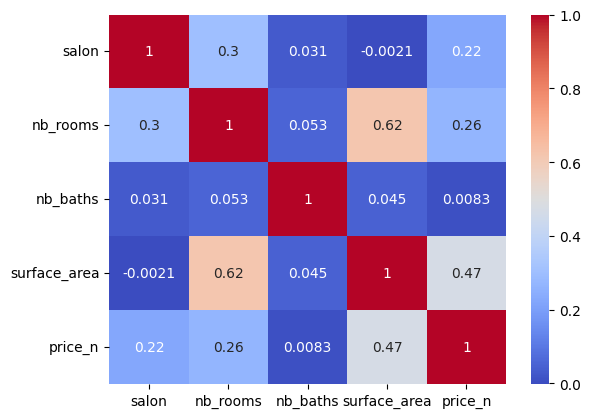

In [14]:
correlation=db.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='coolwarm')


Interprétation des corrélations sur la figure ci-dessus:

___________________________Corrélations Fortes/Modérées___________________________

nb_rooms VS surface_area (0.62) :
Lien modéré/fort positif. Logique : plus de pièces impliquent généralement une plus grande surface.

surface_area VS price_n (0.47) :
Lien modéré. La surface influence significativement le prix (variable cible).

___________________________Corrélations Faibles___________________________

nb_rooms VS price_n (0.26) :
Impact faible sur le prix, contrairement à la surface.

salon VS price_n (0.22) :
Présence d'un salon a un effet potentiellement faible sur le prix.

salon VS nb_rooms (0.3) :
Légère tendance à avoir plus de pièces si un salon est présent.

___________________________Corrélations Négligeables (proches de 0)___________________________

nb_baths :
Très faible corrélation avec toutes les variables (max = 0.053 avec nb_rooms). Son impact semble isolé.

salon VS surface_area (-0.0021) :
Aucune relation linéaire détectable.

salon VS nb_baths (0.031), surface_area VS nb_baths (0.045) : Liens quasi-inexistants.

La surface est le principal déterminant du prix, suivie du nombre de pièces. Le salon a un effet limité, et le nombre de salles de bains semble sans impact dans ce modèle. 

### Prix VS surface

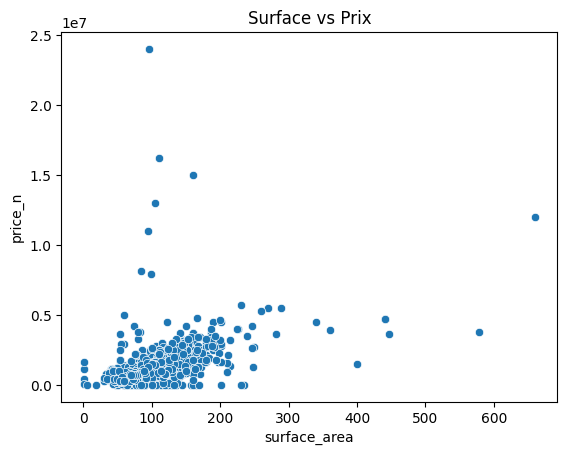

In [15]:
sns.scatterplot(data=db, x='surface_area', y='price_n')
plt.title('Surface vs Prix')
plt.show()

## Prétraitement des données

### Extraction les équipements (equipment) dans des colonnes booléennes à l’aide de str.get_dummies().

In [16]:
equip_cols = db['equipment'].str.get_dummies(sep='/')
db_equip = pd.concat([db, equip_cols], axis=1)

Vérifier si les colonnes binaires se sont vraiment ajoutées.

In [17]:
db_equip.head(4)

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link,price_n,...,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...,2000000.0,...,1,0,0,0,0,0,0,1,0,1
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...,1195000.0,...,1,1,1,0,1,0,0,1,0,0
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...,1350000.0,...,1,1,1,1,1,1,0,1,1,1
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...,900000.0,...,0,1,1,0,1,0,1,1,1,1


### Supprimer les colonnes inutiles telles que equipment et link.

In [18]:
db_equip=db_equip.drop(columns=['equipment','link','price'])

Vérifier si les colonnes suprimées pérsistent.

In [19]:
print(db_equip.columns)

Index(['title', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area',
       'price_n', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation',
       'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking',
       'Sécurité', 'Terrasse'],
      dtype='object')


### Traitement de la colonne city_name. Uniformiser les noms de villes : convertir les noms en arabe vers leur équivalent français.

Ici on a listé les noms des villes pour voir lesquelles sont en arabes.

In [20]:
print(db_equip['city_name'].unique())


['Casablanca' 'Dar Bouazza' 'Rabat' 'Marrakech' 'Asilah' 'Bouskoura'
 'Kénitra' 'Mohammedia' 'Agadir' 'Tamesna' 'Salé' 'Had Soualem' 'Temara'
 'Benslimane' 'Tanger' 'Bouznika' 'Meknès' 'Fès' 'El Jadida'
 'El Mansouria' 'Martil' 'الدار البيضاء' 'Fnideq' 'Tétouan' 'Saidia'
 'Nouaceur' 'القنيطرة' 'Tamaris' 'طنجة' 'Cabo Negro'
 'Sidi Allal El Bahraoui' 'Béni Mellal' 'أكادير' nan 'Essaouira' 'Mehdia'
 'المحمدية' 'Oujda' 'Oued Laou' 'Dcheira' 'Sidi Rahal' 'Deroua' 'مراكش'
 'Ain Attig' 'Safi' 'الرباط' 'Inzegan' 'Ifrane' 'Dakhla'
 'Dcheïra El Jihadia' 'Taghazout' 'Sidi Bouknadel' 'Skhirat' 'Khouribga'
 'Berkane' 'Mers El Kheir' 'Berrechid' 'Tiznit' 'Agadir Melloul' 'Nador'
 'El Menzeh' 'Bni Ansar' 'Mdiq' 'Tit Mellil' 'Souk El Arbaa' 'Biougra'
 'Settat' 'Ain Aouda' 'Taza' 'Khemisset' 'Oued Zem' 'Sefrou' 'Merzouga'
 'El Hajeb' 'Selouane' 'Taounate' 'Sidi Bennour' 'El Ksiba']


Ici on remplace.

In [21]:
db_equip.city_name=db_equip.city_name.replace({
    'الدار البيضاء': 'Casablanca',
    'الرباط': 'Rabat',
    'مراكش': 'Marrakech',
    'أكادير': 'Agadir',
    'فاس': 'Fès',
    'طنجة': 'Tanger',
    'تمارة': 'Temara',
    'سلا': 'Salé',
    'وجدة': 'Oujda',
    'القنيطرة': 'Kénitra',
    'المحمدية': 'Mohammédia',
    'الناظور': 'Nador'
})

Puis on vérifie si vraiment les valeurs en arabe se sont remplacées par leurs équivalents en français.

In [22]:
print(db_equip.city_name.unique())

['Casablanca' 'Dar Bouazza' 'Rabat' 'Marrakech' 'Asilah' 'Bouskoura'
 'Kénitra' 'Mohammedia' 'Agadir' 'Tamesna' 'Salé' 'Had Soualem' 'Temara'
 'Benslimane' 'Tanger' 'Bouznika' 'Meknès' 'Fès' 'El Jadida'
 'El Mansouria' 'Martil' 'Fnideq' 'Tétouan' 'Saidia' 'Nouaceur' 'Tamaris'
 'Cabo Negro' 'Sidi Allal El Bahraoui' 'Béni Mellal' nan 'Essaouira'
 'Mehdia' 'Mohammédia' 'Oujda' 'Oued Laou' 'Dcheira' 'Sidi Rahal' 'Deroua'
 'Ain Attig' 'Safi' 'Inzegan' 'Ifrane' 'Dakhla' 'Dcheïra El Jihadia'
 'Taghazout' 'Sidi Bouknadel' 'Skhirat' 'Khouribga' 'Berkane'
 'Mers El Kheir' 'Berrechid' 'Tiznit' 'Agadir Melloul' 'Nador' 'El Menzeh'
 'Bni Ansar' 'Mdiq' 'Tit Mellil' 'Souk El Arbaa' 'Biougra' 'Settat'
 'Ain Aouda' 'Taza' 'Khemisset' 'Oued Zem' 'Sefrou' 'Merzouga' 'El Hajeb'
 'Selouane' 'Taounate' 'Sidi Bennour' 'El Ksiba']


On observe que parmis les noms de villes on a une valeur nan, on va supprimer la ligne correspondantes:

In [23]:
db_equip = db_equip[db_equip['city_name'].notna()]

## Gestion des valeurs manquantes

### Pour les colonnes numériques : imputer les valeurs manquantes par la médiane.

In [24]:
for col in db_equip.select_dtypes(include='number').columns:
    db_equip[col]=db_equip[col].fillna(db_equip[col].median())

### Pour les colonnes catégorielles (chaînes de caractères) : imputer avec "Unknown".

In [25]:
for col in db_equip.select_dtypes(include='object').columns:
    db_equip[col]=db_equip[col].fillna('Unknown')

Vérifier s'il ya encore des valeurs manquantes.

In [26]:
print(db_equip.isnull().sum())

title              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
price_n            0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
dtype: int64


Le remplissage des valeurs manquantes fait.

## Détection et suppression des valeurs aberrantes:

### Détéction des valeurs abérrantes

Ici on vérifie si les valeurs prises par les colonnes 'nb_rooms', 'nb_baths' et 'salon' sont logiques.

In [27]:
print(db_equip.nb_rooms.unique())
print(db_equip.salon.unique())
print(db['salon'].value_counts().sort_index())
print(db['nb_baths'].value_counts().sort_index())

[2. 1. 3. 4. 5. 6. 7.]
[1. 2. 3. 0. 4. 5. 8.]
salon
0.0      14
1.0    1186
2.0     341
3.0      31
4.0       4
5.0       2
8.0       1
Name: count, dtype: int64
nb_baths
0.0        5
1.0      577
2.0      751
3.0       94
4.0        5
5.0        1
6.0        1
57.0       1
60.0       1
70.0       1
77.0       1
83.0       2
90.0       1
110.0      1
113.0      1
134.0      1
Name: count, dtype: int64


On remarque que les valeurs prises par les colonnes 'nb_rooms' et 'salon' sont logiques. Dans ce cas on pense qu'il ne faut chercher les valeurs abérrantes là dessus.

Mais pour la colonne 'nb_baths', il y'a clairement peu de valeurs abérrantes car on pense qu'un logement ne peut pas avoir par exemple 134 bathrooms. Donc cette colonne doit etre néttoyer.

In [28]:
def outl(data):
    colonnes=['surface_area','price_n']
    for col in colonnes:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        data_non_filered=data[(data[col]<= Q1-1.5*IQR) | (data[col]>= Q3+1.5*IQR)]
        if data_non_filered.empty :
           print(f"Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne {col}")
        else:
          print(f"Le data frame contient les valeurs abérrantes, pour la colonne {col}")
print(outl(db_equip))

Le data frame contient les valeurs abérrantes, pour la colonne surface_area
Le data frame contient les valeurs abérrantes, pour la colonne price_n
None


### Supression des valeurs abérrantes

In [29]:
def supprimer_outliers(data):
    colonnes=['surface_area','price_n']
    df = data.copy()
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR
        df = df[(df[col] >= borne_inf) & (df[col] <= borne_sup)]
    return df
df_clean = supprimer_outliers(db_equip)

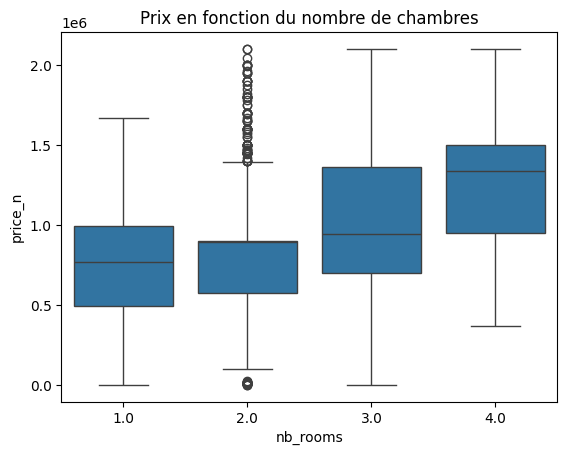

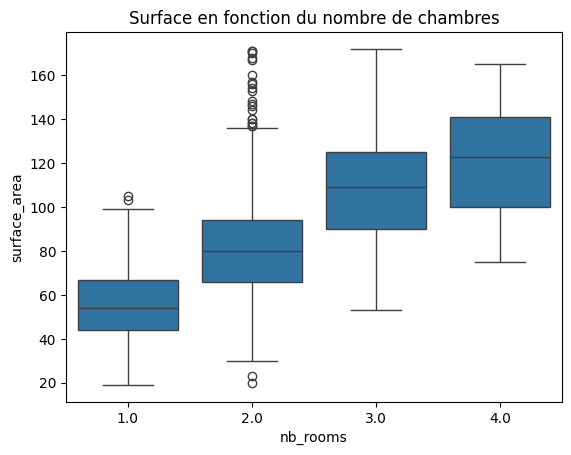

In [30]:
sns.boxplot(data=df_clean,x='nb_rooms',y='price_n')
plt.title("Prix en fonction du nombre de chambres")
plt.show()
sns.boxplot(data=df_clean,x='nb_rooms',y='surface_area')
plt.title("Surface en fonction du nombre de chambres")
plt.show()

In [31]:
print("Nombre de lignes avant :", db_equip.shape[0])
print("Nombre de lignes après :", df_clean.shape[0])

Nombre de lignes avant : 1731
Nombre de lignes après : 1533


La taille du dataset a diminué, donc on a bien illiminé quelques valeurs abérrantes.

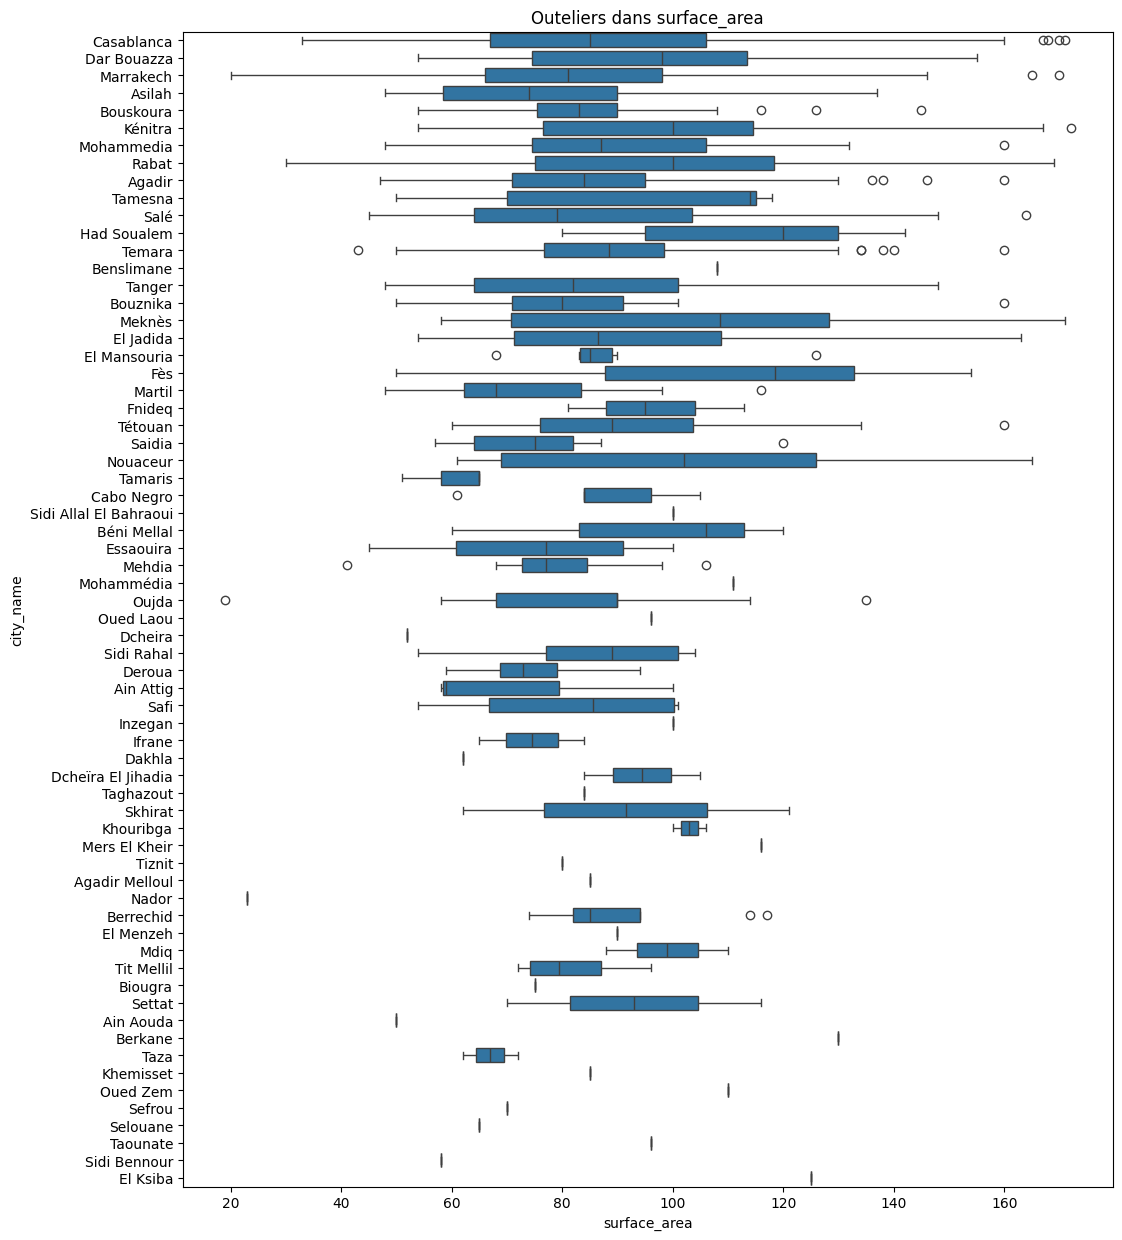

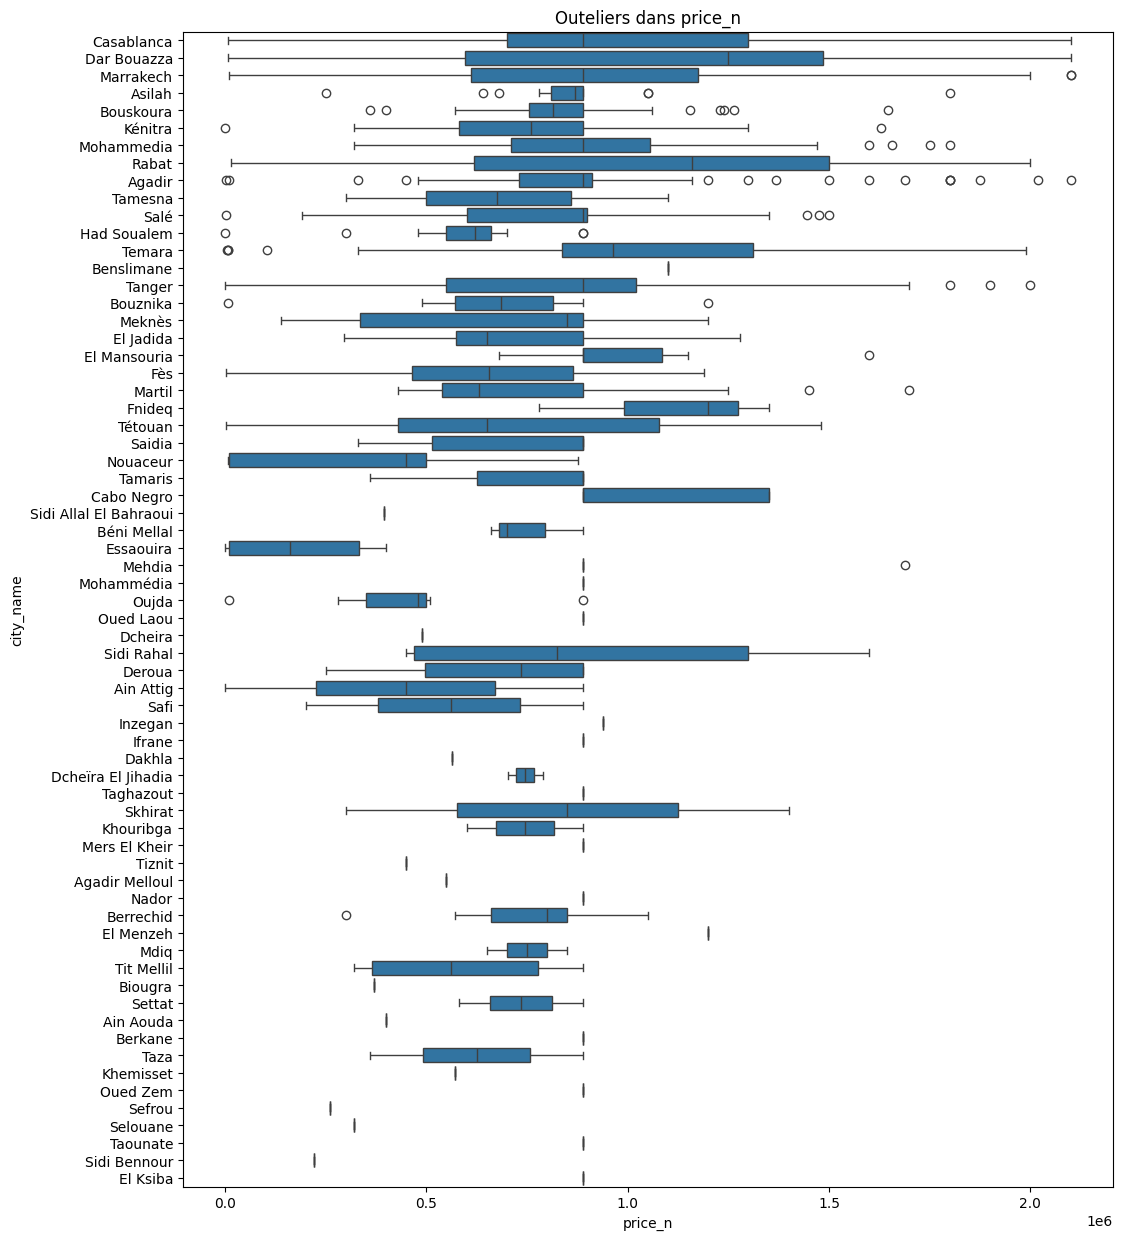

In [32]:
for col in ['surface_area','price_n']:
    plt.figure(figsize=(12,15))
    sns.boxplot(df_clean,x=col,y='city_name')
    plt.title(f"Outeliers dans {col}")
    plt.show()


Pour la première figure qui contient les boites à moustaches de la variable continue 'surface_area' par rapport à la variable catégorielle 'city_name', on remarque qu'il y'a une inégalité marquée des surfaces urbaines au Maroc, avec une concentration du développement urbain dans quelques villes comme Casablanca, Rabat, Marrakech.

Cette différence illustre la concentration du développement urbain dans les pôles économiques, ce qui est courant au Maroc.

Pour la deuxième figure concernant la variable 'price_n', on remarque le prix élevé  des logements surtout dans les villes économiques ou touristiques.

<Axes: ylabel='surface_area'>

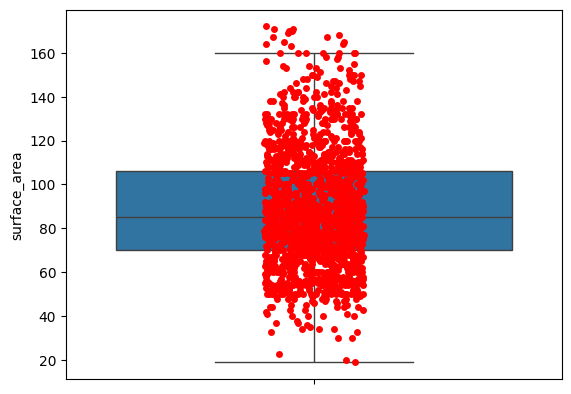

In [33]:
sns.boxplot(data=df_clean, y="surface_area", showfliers=False)  
sns.stripplot(data=df_clean, y="surface_area", color="red")     

Meme si dans nos boxplots on remarque qu'il existe toujours des outeliers, mais leurs valeurs semblent logiques, et on peut continuer notre analyse sans les supprimer.

## Encodage des variables catégorielles:

Les modèles de machine learning ne comprennent que des nombres.
Donc si on a une variable catégorielle comme city_name (ex : Casablanca, Rabat, Marrakech), il faut la transformer en nombres. Sinon le modèle ne pourra pas l’utiliser du tout.


C'est pour cela on doit appliquer un Label Encoding selon le modèle utilisé, en particulier sur city_name.

Pour un modèle basé sur les arbres (RandomForest, XGBoost, LightGBM…), LabelEncoder suffit et est plus efficace.

Pour un modèle linéaire, il faut plutôt faire un One-Hot Encoding (pd.get_dummies()), car les valeurs numériques du label encoder peuvent fausser l’interprétation du modèle.

Et puisqu'on va comparer entre plusieurs modèles entre eux on va choisir d'adopter la méthode du One-Hot Encoding qui peut fonctionner correctement avec tout types de modèle Machine Learning.

Puisque le nombre de villes uniques cité est très grand ~ 70 villes, donc le faite d'utiliser One-Hot Encoding va ajouter à la fois 70 nouvelles colonnes ce qui va impacter négativement la précision des modèles (surtout les modèles linéaires). C'est pour cela qu'on a choisi d'identifier les villes fréquentes (top 10), puis dans une meme case les villes citées rarement.

In [34]:
top_villes = df_clean['city_name'].value_counts().nlargest(15).index
print(top_villes)

Index(['Casablanca', 'Marrakech', 'Tanger', 'Kénitra', 'Agadir', 'Temara',
       'Rabat', 'Mohammedia', 'Salé', 'Bouskoura', 'El Jadida', 'Fès',
       'Meknès', 'Saidia', 'Martil'],
      dtype='object', name='city_name')


Créer une nouvelle colonne 'city_grouped' compacte.

In [35]:
df_clean['city_grouped'] = df_clean['city_name'].apply(
    lambda x: x if x in top_villes else 'Autres')

In [36]:
df_clean.city_grouped

0       Casablanca
1       Casablanca
2           Autres
3       Casablanca
6        Marrakech
           ...    
1765        Meknès
1766        Autres
1767        Tanger
1768        Agadir
1769        Agadir
Name: city_grouped, Length: 1533, dtype: object

Encoder 1\0 chaque colonne de 'city_grouped'.

In [37]:
df_encoded = pd.get_dummies(df_clean, columns=['city_grouped'], drop_first=True)
# Meme si get_dummies retourne que 0 1, mais elle me retourne True\False, donc il fallait modifier!
#  Trouver toutes les colonnes booléennes (True/False)
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Les convertir uniquement elles en 0/1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
print(df_encoded.columns)
df_encoded.head()


Index(['title', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area',
       'price_n', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation',
       'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking',
       'Sécurité', 'Terrasse', 'city_grouped_Autres', 'city_grouped_Bouskoura',
       'city_grouped_Casablanca', 'city_grouped_El Jadida', 'city_grouped_Fès',
       'city_grouped_Kénitra', 'city_grouped_Marrakech', 'city_grouped_Martil',
       'city_grouped_Meknès', 'city_grouped_Mohammedia', 'city_grouped_Rabat',
       'city_grouped_Saidia', 'city_grouped_Salé', 'city_grouped_Tanger',
       'city_grouped_Temara'],
      dtype='object')


,title,city_name,salon,nb_rooms,nb_baths,surface_area,price_n,Ascenseur,Balcon,Chauffage,...,city_grouped_Kénitra,city_grouped_Marrakech,city_grouped_Martil,city_grouped_Meknès,city_grouped_Mohammedia,city_grouped_Rabat,city_grouped_Saidia,city_grouped_Salé,city_grouped_Tanger,city_grouped_Temara
0,CMN-MA-1752 - Appartement à vendre à Palmier,Casablanca,1.0,2.0,2.0,168.0,2000000.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,Casablanca,1.0,2.0,2.0,98.0,1195000.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Appartement à vendre 81 m² à Dar Bouazza,Dar Bouazza,1.0,2.0,2.0,81.0,1350000.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,Casablanca,1.0,1.0,1.0,56.0,900000.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Appartement à vendre 98 m² à Marrakech,Marrakech,1.0,3.0,3.0,98.0,760000.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
df_encoded['nb_total_pieces'] = df_encoded['nb_rooms'] + df_encoded['salon']

## Séparation des données:

Définir la variable cible y = df["price"].

Définir les variables explicatives X à partir des colonnes sélectionnées. Diviser les données en ensemble d’entraînement et de test (80% / 20%) avec train_test_split.

Il faut séparer le training set et le testing set avant de standariser.

### Définition des variables Entrée-Sortie

In [39]:
print(df_encoded.columns)

Index(['title', 'city_name', 'salon', 'nb_rooms', 'nb_baths', 'surface_area',
       'price_n', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation',
       'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking',
       'Sécurité', 'Terrasse', 'city_grouped_Autres', 'city_grouped_Bouskoura',
       'city_grouped_Casablanca', 'city_grouped_El Jadida', 'city_grouped_Fès',
       'city_grouped_Kénitra', 'city_grouped_Marrakech', 'city_grouped_Martil',
       'city_grouped_Meknès', 'city_grouped_Mohammedia', 'city_grouped_Rabat',
       'city_grouped_Saidia', 'city_grouped_Salé', 'city_grouped_Tanger',
       'city_grouped_Temara', 'nb_total_pieces'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['price_n', 'title','city_name'], axis=1) # axis=1 veut dire qu'on supprime une colonne pas une ligne
y = df_encoded['price_n']

### Division du data en training set et du testing set

Ici on divise les données en train et test	Pour ne jamais "voir" les données du test pendant l'entraînement.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#random_state=42 === Utilisé pour reproduire le même découpage à chaque exécution (très important pour la cohérence)

In [42]:
#df_encoded.to_csv('data_cleaned.csv', index=False)

### Choisir les variables numériques corrélées au prix (corr > 0.15).

Vérifier que les variables choisies ne sont pas fortement corrélées entre elles pour éviter la redondance.

In [43]:
corr_train = X_train.join(y_train).corr()
corr_target = corr_train['price_n'].drop('price_n')
selected_vars = corr_target[abs(corr_target) >0.16].index.tolist()
print(selected_vars)

# 4. Réduire X_train et X_test aux variables sélectionnées
X_train_sel = X_train[selected_vars].copy()
X_test_sel = X_test[selected_vars].copy()

['nb_rooms', 'surface_area', 'Ascenseur', 'Climatisation', 'Concierge', 'Parking', 'Terrasse', 'city_grouped_Casablanca', 'nb_total_pieces']


Vérification à l'aide d'une matrice de corrélation.

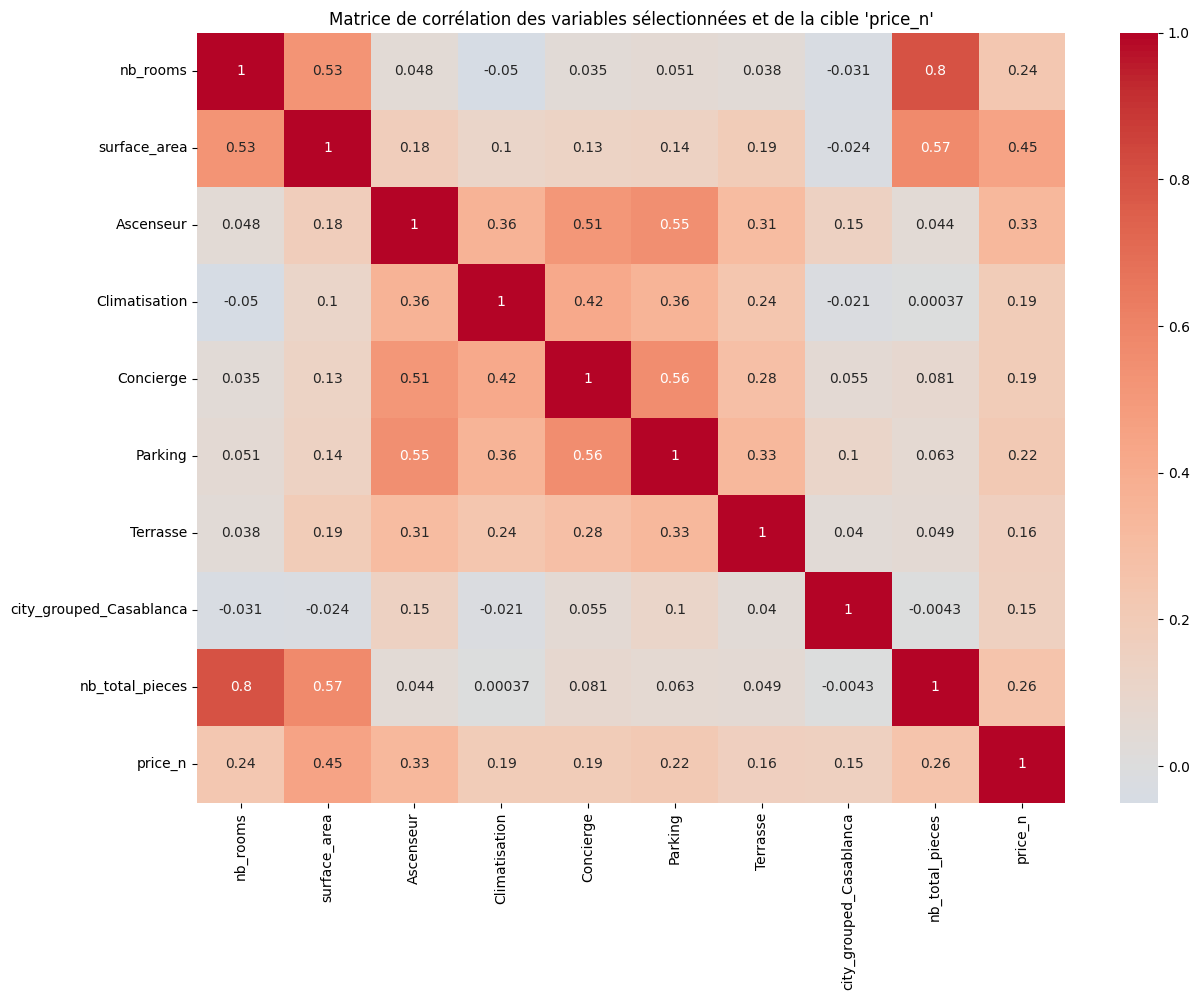

In [44]:
corr_selected = df_encoded[selected_vars + ['price_n']].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables sélectionnées et de la cible 'price_n'")
plt.show()

### Mise à l’échelle des variables:

Appliquer une normalisation (MinMaxScaler) ou une standardisation (StandardScaler) sur les variables numériques pour harmoniser les échelles pour chaque set independement de l'autre ( Training_set, Testing_set)

In [45]:
from sklearn.preprocessing import StandardScaler
# Il faut sélectionner les colonnes numériques (hors variable cible et colonnes encodées déjà en 0/1)
numerical_cols = ['nb_rooms', 'surface_area','nb_total_pieces']
scaler = StandardScaler()
X_train_sel[numerical_cols] = scaler.fit_transform(X_train_sel[numerical_cols])
X_test_sel[numerical_cols] = scaler.transform(X_test_sel[numerical_cols])
print(X_test_sel.columns)

Index(['nb_rooms', 'surface_area', 'Ascenseur', 'Climatisation', 'Concierge',
       'Parking', 'Terrasse', 'city_grouped_Casablanca', 'nb_total_pieces'],
      dtype='object')


#### Min Max scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
X_train_s = X_train[selected_vars].copy()
X_test_s= X_test[selected_vars].copy()
# Sélection des colonnes numériques à normaliser
numerical_cols = ['nb_rooms', 'surface_area']

# Initialisation du scaler
scaler = MinMaxScaler()

# Application sur les données d'entraînement
X_train_s[numerical_cols] = scaler.fit_transform(X_train_s[numerical_cols])

# Application sur les données de test
X_test_s[numerical_cols] = scaler.transform(X_test_s[numerical_cols])

# Vérification
print(X_test_s.columns)


Index(['nb_rooms', 'surface_area', 'Ascenseur', 'Climatisation', 'Concierge',
       'Parking', 'Terrasse', 'city_grouped_Casablanca', 'nb_total_pieces'],
      dtype='object')


# Entraînement du modèle de régression linéaire

Importer les bibliothèques correspondantes:

In [47]:
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.metrics import mean_squared_error, r2_score  # Évaluation du modèle

### Entrainement du modèle sur l'ensemble du train.

In [48]:
model = LinearRegression()
history=model.fit(X_train_sel, y_train)

### Évaluation du modèle.
Prédiction sur l’ensemble de test

In [49]:
y_pred = model.predict(X_test_sel)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")

Erreur quadratique moyenne (MSE) : 92856380755.48
Coefficient de détermination (R²) : 0.32


Ici, dans le premier coup , on a obtenue R² = 0.21, ce qui signifie que 21% du prix d'un logement est expliquée par les variables d'entrée. Il reste 79 % d’incertitude non expliquée, ce qui peut être dû à des facteurs non pris en compte ou à autres causes.

Et pour remedier à ce problème, on a ajouté en haut une autre feature qui est la somme des chambres pour aider les modèles Machine Learning à mieux prédire. 

Comme résultat le coefficient R² a augmenté pour prendre une valeur plus résonnable qui est 0.32.

__________________________________________________________________________________________________

Puisque le R² est moyen, on a bien un risque du sur apprentissage, c'est pour cela qu'on va comparer le coefficient de détermination R² dans le training set et le testing set. Pour vérifier que notre modèle est bon, on doit obtenir des valeurs de R² proches dans les deux cas.

In [51]:
# Prédictions
y_train_pred = model.predict(X_train_sel)

# Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f"R² Entraînement : {r2_train:.3f}")
print(f"R² Test        : {r2_test:.3f}")

# Écart
print(f"Écart entre train et test : {abs(r2_train - r2_test):.3f}")

R² Entraînement : 0.280
R² Test        : 0.323
Écart entre train et test : 0.043


On remarque que l'écart est très minime, donc notre modèle de regression linéaire n'est pas en overfitting.

### Visualisation des résultats
Comparaison des valeurs réelles et prédites

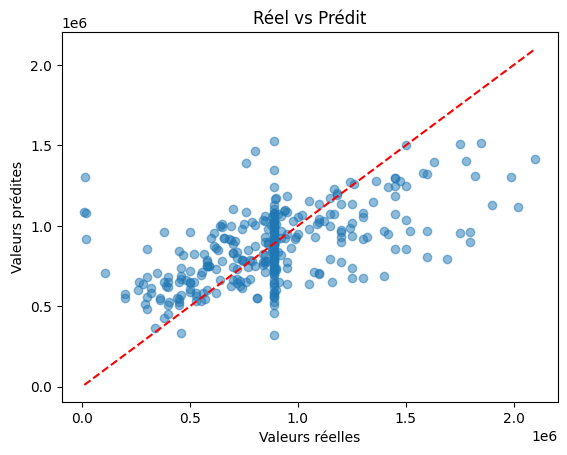

In [52]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne y=x
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Réel vs Prédit')
plt.show()


# Entrainement du modèle Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Création du modèle
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
model_rf.fit(X_train, y_train)

# Prédiction sur les données test
y_pred_rf = model_rf.predict(X_test)


In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R²: {r2:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Random Forest - R²: 0.308, RMSE: 308078.10, MAE: 211566.48


### Vérification de l'overfitting du modèle Random forest.

In [55]:
# Prédictions
y_train_pred_rf = model_rf.predict(X_train)

# Scores
r2_train = r2_score(y_train, y_train_pred_rf)
r2_test = r2_score(y_test, y_pred_rf)

print(f"R² Entraînement : {r2_train:.3f}")
print(f"R² Test        : {r2_test:.3f}")

# Écart
print(f"Écart entre train et test : {abs(r2_train - r2_test):.3f}")

R² Entraînement : 0.908
R² Test        : 0.308
Écart entre train et test : 0.600


L'écart est important donc le modèle est en risque d'overfitting.

### Vérification par des visualisations.

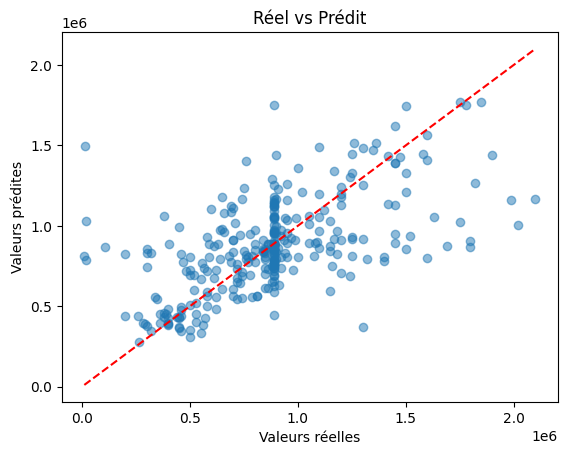

In [56]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne y=x
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Réel vs Prédit')
plt.show()


# Entrainement du modèle SVR

### Importation des bibliothèques

In [57]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

Entrainement du modèle

In [58]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

svr_model = SVR(kernel='rbf')  

svr_model.fit(X_train_sel, y_train)

y_pred_svr = svr_model.predict(X_test_sel)

r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("SVR (Support Vector Regressor)")
print(f"R²       : {r2_svr:.4f}")
print(f"RMSE     : {rmse_svr:.2f}")
print(f"MAE      : {mae_svr:.2f}")


SVR (Support Vector Regressor)
R²       : -0.0015
RMSE     : 370701.95
MAE      : 263556.06


Les resultats d'évaluation du modèle SVR montrent que ce n'est pas du tout le bon modèle pour notre étude. 

Ceci peut s'expliquer par le faite que le modèle SVR est très sensibles aux outeliers, ainsi qu'il a peu de tolérance à la variance des données.

### Check du l'overfitting

In [59]:
# Prédictions
y_train_pred_svr= svr_model.predict(X_train_sel)

# Scores
r2_train = r2_score(y_train, y_train_pred_svr)
r2_test = r2_score(y_test, y_pred_svr)

print(f"R² Entraînement : {r2_train:.3f}")
print(f"R² Test        : {r2_test:.3f}")

# Écart
print(f"Écart entre train et test : {abs(r2_train - r2_test):.3f}")

R² Entraînement : 0.000
R² Test        : -0.001
Écart entre train et test : 0.001


Le modèle n'arrive pas à assimiler le jeu de données et à faire des relations entre les variables. Et ceci est remarqué dans le train aussi nque dans le test (R² ≈ 0). 

Ceci est peut etre du aux causes cités précédement.
Nous allons pas scaler ce modèle car on a déjà trois modèles qui ont donnés des très bons résultats.

# Entrainement du modèle Gradient Boosting

In [60]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("Gradient Boosting Regressor")
print(f"R²       : {r2_gbr:.4f}")
print(f"RMSE     : {rmse_gbr:.2f}")
print(f"MAE      : {mae_gbr:.2f}")


Gradient Boosting Regressor
R²       : 0.3860
RMSE     : 290272.18
MAE      : 200318.81


In [61]:
print(X_test_sel.columns)

Index(['nb_rooms', 'surface_area', 'Ascenseur', 'Climatisation', 'Concierge',
       'Parking', 'Terrasse', 'city_grouped_Casablanca', 'nb_total_pieces'],
      dtype='object')


Les résultats sont parfaitement bons.

Ce modèle est robuste, il gère les non-linéarités complexes, les variables importantes ou non, et les interactions.Ainsi qu'il est moins sensible au scaling.

### Check de l'overfitting

In [62]:
# Prédictions
y_train_pred_gbr= gbr_model.predict(X_train)

# Scores
r2_train = r2_score(y_train, y_train_pred_gbr)
r2_test = r2_score(y_test, y_pred_gbr)

print(f"R² Entraînement : {r2_train:.3f}")
print(f"R² Test        : {r2_test:.3f}")

# Écart
print(f"Écart entre train et test : {abs(r2_train - r2_test):.3f}")

R² Entraînement : 0.568
R² Test        : 0.386
Écart entre train et test : 0.182


Il n y'a pas d'Overfitting pour le modèle Gradient boosting.

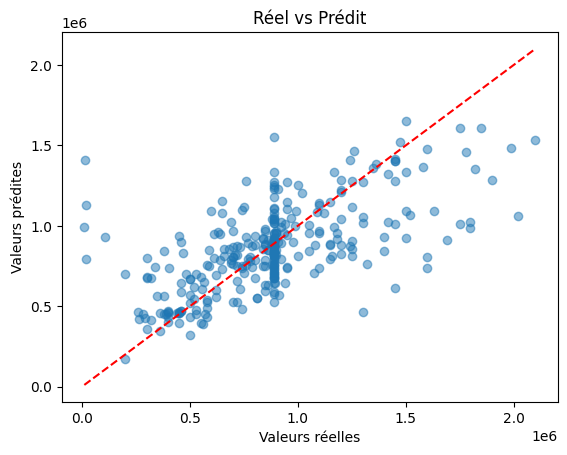

In [63]:
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne y=x
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Réel vs Prédit')
plt.show()

# Validation croisée:

Utiliser la validation croisée (cross-validation) pour évaluer la robustesse des modèles sur différentes portions du jeu de données.

### Modèle de regression linéaire.

In [64]:
from sklearn.model_selection import cross_val_score


# Définir le modèle
model = LinearRegression()

# Validation croisée avec scoring R²
scores = cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')

# Affichage des résultats
print("Scores R² pour chaque fold :", scores)
print("Moyenne R² :", np.mean(scores))
print("Écart-type R² :", np.std(scores))


Scores R² pour chaque fold : [0.25562223 0.26206703 0.25225169 0.2495618  0.28728906]
Moyenne R² : 0.26135836155251513
Écart-type R² : 0.013622753142750339


### Modèle random forest

In [65]:
# Définir le modèle
model = RandomForestRegressor()

# Validation croisée avec scoring R²
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Affichage des résultats
print("Scores R² pour chaque fold :", scores)
print("Moyenne R² :", np.mean(scores))
print("Écart-type R² :", np.std(scores))


Scores R² pour chaque fold : [0.39150383 0.30717641 0.43991699 0.39028536 0.33999068]
Moyenne R² : 0.37377465412371824
Écart-type R² : 0.04590951732984368


### Modèle Gradient Boosting

In [66]:
# Définir le modèle
model = GradientBoostingRegressor()

# Validation croisée avec scoring R²
scores = cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')

# Affichage des résultats
print("Scores R² pour chaque fold :", scores)
print("Moyenne R² :", np.mean(scores))
print("Écart-type R² :", np.std(scores))

Scores R² pour chaque fold : [0.31493147 0.28405322 0.37695869 0.29952473 0.33100888]
Moyenne R² : 0.3212953967704441
Écart-type R² : 0.031919258405450325


# Optimisation des hyperparamètres:

Utiliser GridSearchCV ou RandomizedSearchCV pour rechercher les meilleurs hyperparamètres pour chaque modèle.

 On va commencer par faire un petit rappel sur ce volet.

C’est quoi un hyperparamètre ?
Les hyperparamètres sont des paramètres fixés manuellement avant l’entraînement du modèle, contrairement aux paramètres internes (comme les poids) qui sont appris automatiquement par le modèle pendant l'entraînement.

Exemples :
Pour SVR : C, epsilon, kernel

Pour Random Forest : n_estimators, max_depth, min_samples_split

Pour GradientBoosting : learning_rate, n_estimators, max_depth

Ces hyperparamètres influencent la complexité du modèle, sa capacité à généraliser, et donc son risque de sous-apprentissage ou sur-apprentissage.

Le principe consiste à définir une "grille" de combinaisons de valeurs à tester

Pour chaque combinaison, le modèle est entraîné et évalué via validation croisée

La combinaison qui donne le meilleur score moyen est retenue

-----------------C’est comme tester plusieurs recettes, et garder celle qui donne le meilleur gâteau.---------------------



In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model_rf = grid_search.best_estimator_

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur R² CV :", grid_search.best_score_)

Meilleurs paramètres : {'max_depth': 10, 'n_estimators': 100}
Meilleur R² CV : 0.38259743210530794


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialisation du modèle
gbr = GradientBoostingRegressor(random_state=42)

# Grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# GridSearch avec validation croisée
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Entraînement
grid_search_gbr.fit(X_train, y_train)
best_model_gbr = grid_search_gbr.best_estimator_
# Résultats
print(" Meilleurs paramètres :", grid_search_gbr.best_params_)
print(" Meilleur R² en cross-validation :", grid_search_gbr.best_score_)


 Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
 Meilleur R² en cross-validation : 0.4016233474073371


#### On remarque que la méthode du Grid search a amélioré les performances des modèles. Et par la suite, on vaa les utilisé dans l'étape suivante.

# Sélection du meilleur modèle

Comparer les performances des modèles et sélectionner celui avec les meilleurs scores (ex: R² élevé, RMSE faible).

Sauvegarder le modèle entraîné (model.pkl)

 #### À partir des résultats obtenus, on constate que le modèle Gradient Boosting atteint un R² de 0.40, ce qui est relativement important, bien supérieur aux autres modèles testés. Par conséquent, on choisit ce modèle pour la prédiction des prix immobiliers.

Meme si on a arrivé à choisir le modèle plus convenable, on va créer des fichiers .pkl pour les trois modèles avec R² supérieures, afin de visualiser plus clairement les différences de prédiction entre ces modèles.

In [69]:
import joblib

# Supposons que 'best_rf_model' est ton modèle Random Forest entraîné
joblib.dump(best_model_rf, 'random_forest_model.pkl')
print("Modèle sauvegardé dans random_forest_model.pkl")


Modèle sauvegardé dans random_forest_model.pkl


In [70]:
joblib.dump(best_model_gbr, 'Gradient_boosting.pkl')
print("Modèle sauvegardé dans Gradient_boosting.pkl")

Modèle sauvegardé dans Gradient_boosting.pkl
